## Neural Network Classification – Heart Failure Clinical Records

<img src = "https://cusaas.com/blog/en/neural-classification/network.png" width ="400">

In this section, we build a **Neural Network Classifier** to predict the risk of **death events** in heart failure patients.

**Dataset:** `heart_failure_clinical_records_dataset2.csv`  
**Goal:** Predict `DEATH_EVENT` (0 = no, 1 = yes) using clinical features such as age, ejection fraction, serum creatinine, etc.

We will:
1. Load and inspect the data  
2. Prepare features (`X_cls`) and target (`y_cls`)  
3. Scale the features  
4. Train an `MLPClassifier`  
5. Evaluate using accuracy, F1-score, confusion matrix, and classification report  


## Load and Inspect

In [2]:
import pandas as pd
heart_df = pd.read_csv("/content/drive/MyDrive/INDE 577 github Jupyter files/Supervised Learning/Neural Network/heart_failure_clinical_records_dataset2.csv")

print(heart_df.head())
print(heart_df.info())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  DEATH_EVENT  
0        0            1  
1        0            1  
2        1            1  


## Prepare Features and Target (Classification)

We use:

- **Target (`y_cls`)**: `DEATH_EVENT`  
- **Features (`X_cls`)**: all other columns  

All features are numerical/binary, so we can use them directly after scaling.


In [3]:
# Target
y_cls = heart_df["DEATH_EVENT"]

# Features: all columns except DEATH_EVENT
X_cls = heart_df.drop(columns=["DEATH_EVENT"])

print("Classification Features shape:", X_cls.shape)
print("Classification Target shape:", y_cls.shape)
X_cls.head()


Classification Features shape: (299, 11)
Classification Target shape: (299,)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


##Train/Test Split + Scaling (Classification)

We split into training and test sets, then scale the features for stable neural network training.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

cls_scaler = StandardScaler()
X_cls_train_scaled = cls_scaler.fit_transform(X_cls_train)
X_cls_test_scaled = cls_scaler.transform(X_cls_test)


## Build and Train Neural Network Classifier

We use `MLPClassifier` with:

- Hidden layers: (64, 32)  
- Activation: ReLU  
- Solver: Adam  

We train it on the scaled training data to predict `DEATH_EVENT`.


In [5]:
from sklearn.neural_network import MLPClassifier

mlp_cls = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=42
)

mlp_cls.fit(X_cls_train_scaled, y_cls_train)

print("Neural Network Classifier training complete.")


Neural Network Classifier training complete.


## Evaluate Classification Model

We evaluate using:

- Accuracy  
- Precision, Recall, F1-score  
- Confusion matrix  
- Classification report  


Neural Network Classification – Metrics
Accuracy : 0.700
Precision: 0.529
Recall   : 0.474
F1-score : 0.500

Classification Report:

              precision    recall  f1-score   support

    No Death       0.77      0.80      0.79        41
       Death       0.53      0.47      0.50        19

    accuracy                           0.70        60
   macro avg       0.65      0.64      0.64        60
weighted avg       0.69      0.70      0.70        60



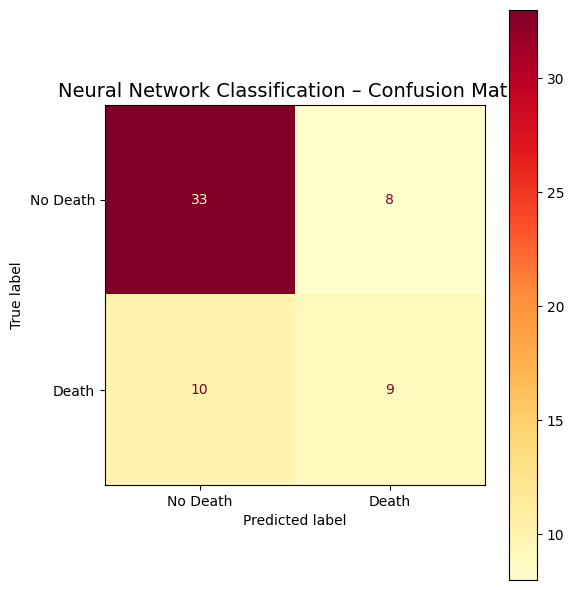

In [9]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Predictions
y_cls_pred = mlp_cls.predict(X_cls_test_scaled)

# Metrics
acc = accuracy_score(y_cls_test, y_cls_pred)
prec = precision_score(y_cls_test, y_cls_pred)
rec = recall_score(y_cls_test, y_cls_pred)
f1 = f1_score(y_cls_test, y_cls_pred)

print("Neural Network Classification – Metrics")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}\n")

print("Classification Report:\n")
print(classification_report(y_cls_test, y_cls_pred, target_names=["No Death", "Death"]))

# Confusion matrix with improved color contrast
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y_cls_test,
    y_cls_pred,
    display_labels=["No Death", "Death"],
    cmap="YlOrRd",       # << more contrast
    ax=ax,
    colorbar=True
)
ax.set_title("Neural Network Classification – Confusion Matrix", fontsize=14)
plt.tight_layout()
plt.show()
